In [1]:
from google.colab import files
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

import tensorflow as tf # to convert to onehot intuitively using to_categorical

In [ ]:
files.upload() # upload pickle file from local drive

Saving god_grandma2001.p to god_grandma2001 (1).p


{'god_grandma2001.p': b'\x80\x03cpandas.core.frame\nDataFrame\nq\x00)\x81q\x01}q\x02(X\x05\x00\x00\x00_dataq\x03cpandas.core.internals\nBlockManager\nq\x04)\x81q\x05(]q\x06(cpandas.core.indexes.base\n_new_Index\nq\x07cpandas.core.indexes.base\nIndex\nq\x08}q\t(X\x04\x00\x00\x00dataq\ncnumpy.core.multiarray\n_reconstruct\nq\x0bcnumpy\nndarray\nq\x0cK\x00\x85q\rC\x01bq\x0e\x87q\x0fRq\x10(K\x01K\x04\x85q\x11cnumpy\ndtype\nq\x12X\x02\x00\x00\x00O8q\x13K\x00K\x01\x87q\x14Rq\x15(K\x03X\x01\x00\x00\x00|q\x16NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK?tq\x17b\x89]q\x18(X\x07\x00\x00\x00Guessesq\x19X\x07\x00\x00\x00Indexesq\x1aX\x03\x00\x00\x00Oneq\x1bX\x04\x00\x00\x00Zeroq\x1cetq\x1dbX\x04\x00\x00\x00nameq\x1eNu\x86q\x1fRq h\x07cpandas.core.indexes.range\nRangeIndex\nq!}q"(h\x1eNX\x05\x00\x00\x00startq#K\x00X\x04\x00\x00\x00stopq$M\xdc\x05X\x04\x00\x00\x00stepq%K\x01u\x86q&Rq\'e]q((h\x0bh\x0cK\x00\x85q)h\x0e\x87q*Rq+(K\x01K\x02M\xdc\x05\x86q,h\x12X\x02\x00\x00\x00f4q-K\x00K\x01\x87q.Rq/(K\x03X\x01\

In [ ]:
files.upload() # upload test labels from local drive

Saving test_complex_labels.csv to test_complex_labels (1).csv
Saving test_simple_labels.csv to test_simple_labels (2).csv


{'test_complex_labels.csv': b'0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n1.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.000000000000000000e+00\r\n0.0000000000000000

In [99]:
predictions = pickle.load(open('Multiclass_Attempt_2.p', 'rb')) # load pickle file that was just uploaded
test_binary_labels = pd.read_csv('test_binary_labels.csv', header=None)  # Filepath to test binary labels 
test_binary_labels_one_hot = pd.DataFrame(np.eye(2)[test_binary_labels.values.reshape(1500).astype(int)])
test_multiclass_labels = pd.read_csv('test_multiclass_labels.csv', header=None) # Filepath to test multiclass labels


test_binary_labels_pnehot = tf.keras.utils.to_categorical(test_binary_labels, 2).astype(np.float32)
test_multiclass_labels_onehot = tf.keras.utils.to_categorical(test_multiclass_labels, 5).astype(np.float32)

if predictions.shape[1] == 4:
  classifier_type = 'binary'
else:
  classifier_type = 'multiclass'
print(f'evaluating {classifier_type} classifier')

predictions # check to make sure everything is in the right format


evaluating multiclass classifier


,0,1,2,3,4,Unique_Index,predicted_class
0,1.000000,4.675420e-25,0.000000e+00,0.000000e+00,3.475278e-22,5500,0
1,0.999998,2.769881e-30,1.990065e-34,6.795851e-35,1.973883e-06,5501,0
2,0.999703,6.038244e-11,2.028241e-30,7.260327e-17,2.971740e-04,5502,0
3,1.000000,1.709905e-23,0.000000e+00,0.000000e+00,9.170417e-18,5503,0
4,1.000000,4.246841e-21,0.000000e+00,0.000000e+00,5.439514e-18,5504,0
...,...,...,...,...,...,...,...
1495,1.000000,1.994912e-33,0.000000e+00,0.000000e+00,2.277966e-25,6995,0
1496,1.000000,3.660717e-11,0.000000e+00,0.000000e+00,1.027558e-20,6996,0
1497,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.254665e-28,6997,0
1498,1.000000,4.308344e-27,0.000000e+00,0.000000e+00,9.134876e-25,6998,0


In [95]:
## Write the column keys corresponding to entry so the dataframe can be read properly

ID_col = 'Unique_Index'  # whatever they named the col with their unique IDs/indexes
guess_col = 'predicted_class'   # whatever they named the col with their guesses
prob_zero =  0    # whatever they named the col with their probs
prob_one =   1      # etc.
prob_two =   2
prob_three = 3
prob_four =  4


In [100]:
predictions = predictions.sort_values([ID_col])   # Sorting to put IDs/Indices in order

if classifier_type is 'binary':
  #binary classifier
  predictions = predictions.reindex([guess_col, prob_zero, prob_one, ID_col], axis=1)  # for binary classifier, putting columns in order
else:
  #multiclass classifier
  predictions = predictions.reindex([guess_col, prob_zero, prob_one, prob_two, prob_three, prob_four, ID_col], axis=1)  # for multiclass classifier, putting columns in order

predictions # look to see if indices/IDs are in order

,predicted_class,0,1,2,3,4,Unique_Index
0,0,1.000000,4.675420e-25,0.000000e+00,0.000000e+00,3.475278e-22,5500
1,0,0.999998,2.769881e-30,1.990065e-34,6.795851e-35,1.973883e-06,5501
2,0,0.999703,6.038244e-11,2.028241e-30,7.260327e-17,2.971740e-04,5502
3,0,1.000000,1.709905e-23,0.000000e+00,0.000000e+00,9.170417e-18,5503
4,0,1.000000,4.246841e-21,0.000000e+00,0.000000e+00,5.439514e-18,5504
...,...,...,...,...,...,...,...
1495,0,1.000000,1.994912e-33,0.000000e+00,0.000000e+00,2.277966e-25,6995
1496,0,1.000000,3.660717e-11,0.000000e+00,0.000000e+00,1.027558e-20,6996
1497,0,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.254665e-28,6997
1498,0,1.000000,4.308344e-27,0.000000e+00,0.000000e+00,9.134876e-25,6998


In [64]:

def evaluate(predictions, test_binary_labels, test_multiclass_labels, test_multiclass_labels_one_hot, guess_col, prob_zero,
             prob_one, prob_two, prob_three, prob_four, classifier_type): #classifier type either 'binary' or 'multiclass'
    
    binary_confmat_score = np.array([[2, -3],
                                     [-6, 2]])
    
    multiclass_confmat_score = np.array([[2,-1,-1,-3,-3],
                                         [-2,2,-1,-3,-3],
                                         [-2,-1,2,-3,-3],
                                         [-6,-4,-4,2,-2],
                                         [-6,-4,-4,-2,2]])
    
    
    if(classifier_type == 'binary'):            
        confmat = confusion_matrix(test_binary_labels.values.reshape(1500), predictions[guess_col])
        confmat_score = np.sum(confmat * binary_confmat_score)
        
        fpr, tpr, thresholds = metrics.roc_curve(test_binary_labels.values.reshape(1500), predictions[prob_one], pos_label=1)
        roc_auc = metrics.auc(fpr, tpr)

    if(classifier_type == 'multiclass'):
        confmat = confusion_matrix(test_multiclass_labels.values.reshape(1500), predictions[guess_col])
        confmat_score = np.sum(confmat * multiclass_confmat_score)
        
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(5):
            fpr[i], tpr[i], _ = metrics.roc_curve(test_multiclass_labels_onehot[:,i], predictions.drop([guess_col, ID_col], axis = 1).iloc[:, i])
            roc_auc[i] = metrics.auc(fpr[i], tpr[i])

        fpr["micro"], tpr["micro"], _ = metrics.roc_curve(test_multiclass_labels_onehot.ravel(), predictions.drop([guess_col, ID_col], axis = 1).values.ravel())
        roc_auc = metrics.auc(fpr["micro"], tpr["micro"])
    
    
    
    return('Confusion Matrix Score:' + str(confmat_score), 'Roc_Auc:' + str(roc_auc))
    
    

In [101]:
evaluate(predictions, test_binary_labels, test_multiclass_labels, test_multiclass_labels_onehot, guess_col, prob_zero,
         prob_one, prob_two, prob_three, prob_four, classifier_type=classifier_type)

('Confusion Matrix Score:-1774', 'Roc_Auc:0.6439640555555556')

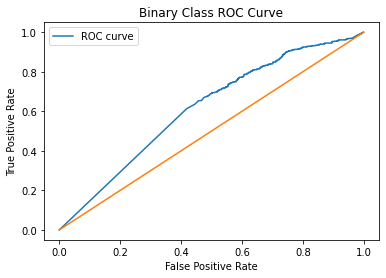

In [98]:
# AUC for binary classifier

fpr, tpr, thresholds = metrics.roc_curve(test_binary_labels.values.reshape(1500), predictions[prob_one], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary Class ROC Curve')
plt.legend()
plt.show()

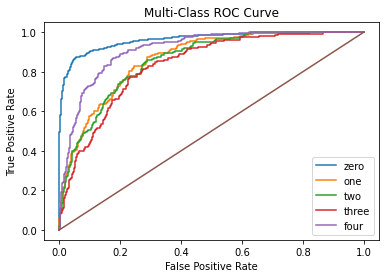

In [29]:
# AUC for multiclass classifier
fpr = dict()
tpr = dict()
roc_auc = dict()
labels = ['zero', 'one', 'two', 'three', 'four']
for i in range(5):
    fpr[i], tpr[i], _ = metrics.roc_curve(test_multiclass_labels_onehot[:, i], predictions.drop([guess_col, ID_col], axis = 1).iloc[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label = labels[i])
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend()
plt.show()

## Troubleshooting tips:

* If a student pickles a file in python 2 you will have to read the pickle file using python 2 (Runtime > Change Runtime Type)